In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

In [4]:
spark = SparkSession.builder.master("local").appName("test").config("spark.driver.memory", "9g").getOrCreate()
sc = spark.sparkContext

In [5]:
youtube = spark.read.option("multiline",'true').json('/user/youtube/blockchainyoutube2022-05-04.json')

In [6]:
#youtube.take(10)

In [7]:
youtube.printSchema()

root
 |-- etag: string (nullable = true)
 |-- items: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- etag: string (nullable = true)
 |    |    |-- id: struct (nullable = true)
 |    |    |    |-- kind: string (nullable = true)
 |    |    |    |-- videoId: string (nullable = true)
 |    |    |-- kind: string (nullable = true)
 |    |    |-- snippet: struct (nullable = true)
 |    |    |    |-- channelId: string (nullable = true)
 |    |    |    |-- channelTitle: string (nullable = true)
 |    |    |    |-- description: string (nullable = true)
 |    |    |    |-- liveBroadcastContent: string (nullable = true)
 |    |    |    |-- publishTime: string (nullable = true)
 |    |    |    |-- publishedAt: string (nullable = true)
 |    |    |    |-- thumbnails: struct (nullable = true)
 |    |    |    |    |-- default: struct (nullable = true)
 |    |    |    |    |    |-- height: long (nullable = true)
 |    |    |    |    |    |-- url: string (nullable 

In [8]:
from pyspark.sql import types as T
import pyspark.sql.functions as F


def flatten(df):
    complex_fields = dict([
        (field.name, field.dataType) 
        for field in df.schema.fields 
        if isinstance(field.dataType, T.ArrayType) or isinstance(field.dataType, T.StructType)
    ])
    
    qualify = list(complex_fields.keys())[0] + "_"

    while len(complex_fields) != 0:
        col_name = list(complex_fields.keys())[0]
        
        if isinstance(complex_fields[col_name], T.StructType):
            expanded = [F.col(col_name + '.' + k).alias(col_name + '_' + k) 
                        for k in [ n.name for n in  complex_fields[col_name]]
                       ]
            
            df = df.select("*", *expanded).drop(col_name)
    
        elif isinstance(complex_fields[col_name], T.ArrayType): 
            df = df.withColumn(col_name, F.explode(col_name))
    
      
        complex_fields = dict([
            (field.name, field.dataType)
            for field in df.schema.fields
            if isinstance(field.dataType, T.ArrayType) or isinstance(field.dataType, T.StructType)
        ])
        
        
    for df_col_name in df.columns:
        df = df.withColumnRenamed(df_col_name, df_col_name.replace(qualify, ""))

    return df

In [9]:
df =flatten(youtube)

In [10]:
df.printSchema()

root
 |-- etag: string (nullable = true)
 |-- kind: string (nullable = true)
 |-- nextPageToken: string (nullable = true)
 |-- regionCode: string (nullable = true)
 |-- etag: string (nullable = true)
 |-- kind: string (nullable = true)
 |-- pageInfo_resultsPerPage: long (nullable = true)
 |-- pageInfo_totalResults: long (nullable = true)
 |-- id_kind: string (nullable = true)
 |-- id_videoId: string (nullable = true)
 |-- snippet_channelId: string (nullable = true)
 |-- snippet_channelTitle: string (nullable = true)
 |-- snippet_description: string (nullable = true)
 |-- snippet_liveBroadcastContent: string (nullable = true)
 |-- snippet_publishTime: string (nullable = true)
 |-- snippet_publishedAt: string (nullable = true)
 |-- snippet_title: string (nullable = true)
 |-- snippet_thumbnails_default_height: long (nullable = true)
 |-- snippet_thumbnails_default_url: string (nullable = true)
 |-- snippet_thumbnails_default_width: long (nullable = true)
 |-- snippet_thumbnails_high_heig

In [11]:
df.createOrReplaceTempView("list_of_videos")

In [12]:
id_videos= spark.sql('SELECT id_videoId FROM list_of_videos')

In [27]:
id_videos.take(1)


[Row(id_videoId='GNyCj4XKP00')]

In [22]:
spark.sql('SELECT snippet_title FROM list_of_videos').show()

+--------------------+
|       snippet_title|
+--------------------+
|Cardano, Ethereum...|
|TU DOIS CONNAITRE...|
|What is blockchai...|
|NFTs And The Bloc...|
|Bitcoin&#39;s uti...|
|Bored Ape Metaver...|
|BITCOIN Breakout ...|
|Blackrock Launche...|
|Conceptos clave p...|
|🔴Here’s How Bots...|
|Middle East is fu...|
|This Crypto could...|
|Algorand Explodes...|
|RIPPLE and XRP PR...|
|CRYPTO : LES BLOC...|
|GOUVERNANCE : La ...|
|Blockchain Develo...|
|Dr. Max Li, CEO o...|
|LES OPPORTUNITÉS ...|
|Brendan Playford,...|
+--------------------+
only showing top 20 rows



In [15]:
links = ['https://www.youtube.com/watch?v='+ id_video for id_video in id_videos]

TypeError: 'Column' object is not callable

In [ ]:
print(links)

In [28]:
video_id ='U62Yn43nOeg'

In [29]:
video_id

'U62Yn43nOeg'

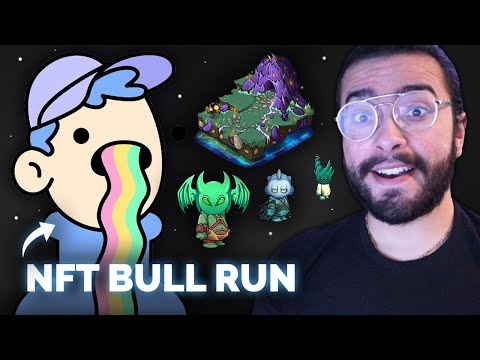

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [31]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [32]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

24838


In [33]:
result

" it is time for another nft market update where we're going to be covering everything that has been going on in the world of nfts in the past seven days we'll first be covering some of the most important news stories that have broken in the nft space we'll then be covering some data and analytics backing the nft market right now we'll cover some upcoming projects we can expect for this week as well as identify some trends and nft collections i am seeing currently as always i really do enjoy making these videos and i have seen that you really enjoy them too so you are definitely not going to want to miss out on this one because we have some insane stuff to talk about we had the largest nft mint ever take place in the past seven days with the other side land nfts officially minting and selling out by yugo labs so we're gonna be covering that here in today's video but before we get started make sure to hit that subscribe and like button if you end up enjoying or finding value in today's 

In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

In [ ]:
str(summarized_text)